# Importing Data from Flat Files

## Introductin to flat files

### Get data from CSVs

In [8]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# View the first few lines of data
print(data.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

### Get data from other flat files
tab-separated values file (TSV)

In [ ]:
# Import pandas with the alias pd
import pandas as pd

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv('vt_tax_data_2016.tsv', sep='\t')
data
# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

In [ ]:
data

      STATEFIPS STATE  zipcode  agi_stub      N1  ...  A85300  N11901  A11901  N11902  A11902
0            50    VT        0         1  111580  ...       0   10820    9734   88260  138337
1            50    VT        0         2   82760  ...       0   12820   20029   68760  151729
2            50    VT        0         3   46270  ...       0   10810   24499   34600   90583
3            50    VT        0         4   30070  ...       0    7320   21573   21300   67045
4            50    VT        0         5   39530  ...       0   12500   67761   23320  103034
...         ...   ...      ...       ...     ...  ...     ...     ...     ...     ...     ...
1471         50    VT    99999         2    2010  ...       0     250     291    1630    3506
1472         50    VT    99999         3    1070  ...       0     230     489     750    1829
1473         50    VT    99999         4     650  ...       0     150     305     390    1055
1474         50    VT    99999         5     750  ...       0     230     824     390    1580
1475         50    VT    99999         6     180  ...     128      60     575      40     190

[1476 rows x 147 columns]

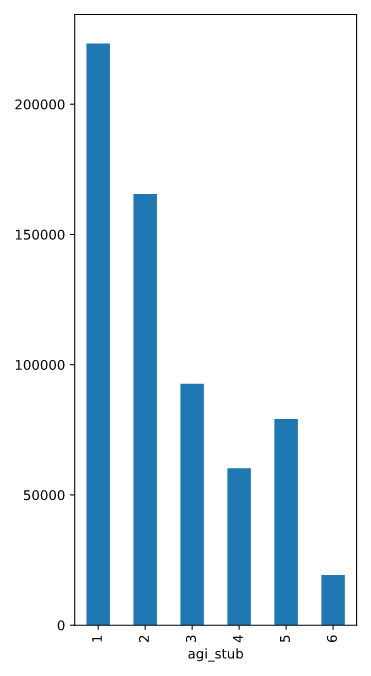

## Modifying flat file imports

**`usecols`**
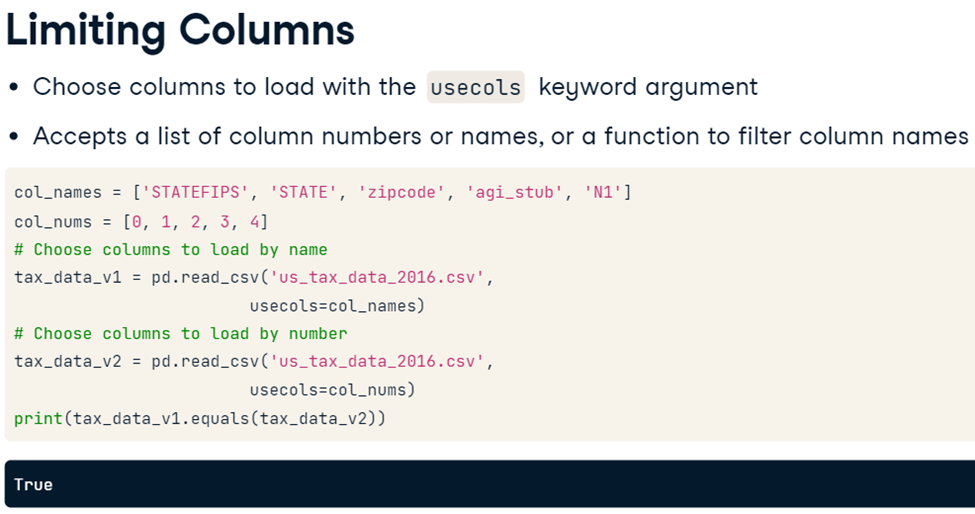

### Import a subset of columns


In [10]:
# Create list of columns to use
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']

# Create dataframe from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols = cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


**`nrows`**, **`skiprows`**, **`names`**
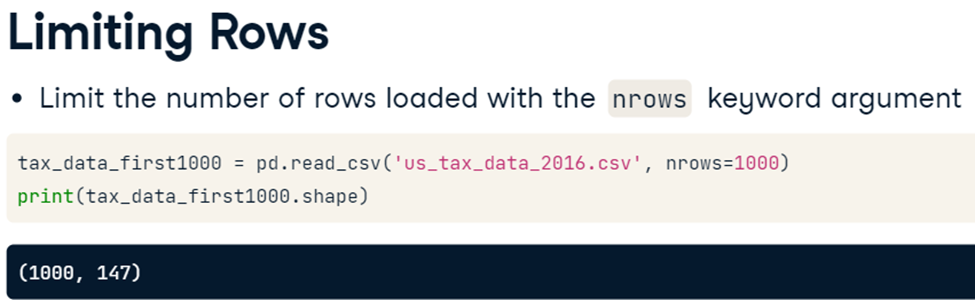

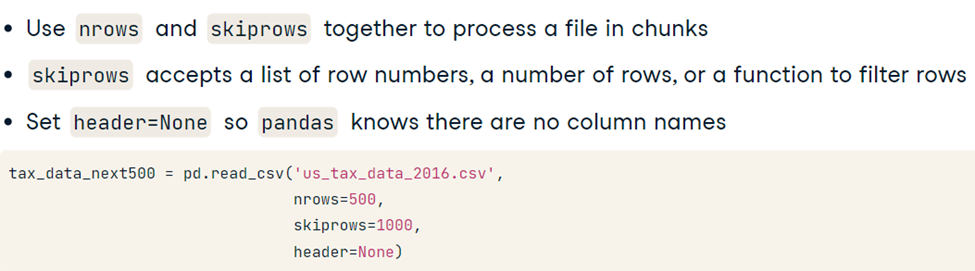


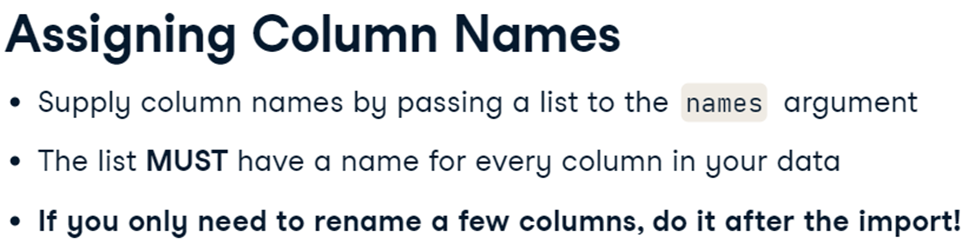

### Import a file in chunks
When working with large files, it can be easier to load and process the data in pieces. 

In [12]:
# Create dataframe of first 500 rows with labeled columns
vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv", 
                               nrows = 500)

In [13]:
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                               nrows = 500,
                               skiprows = 500,
                               header = None,
                               names = list(vt_data_first500))

# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729  
2   2449

### Handling errors and missing data

### Specify data types
When loading a flat file, pandas infers the best data type for each column. Sometimes its guesses are off, particularly for numbers that represent groups or qualities instead of quantities.

In [14]:
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)

STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object


In [15]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {"agi_stub":"category",
              "zipcode": str}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


### Set custom NA values
Part of data exploration and cleaning consists of checking for `missing or NA values` and deciding how to account for them. This is easier when missing values are treated as their own data type. and there are pandas functions that specifically target such NA values. pandas automatically treats some values as missing, but we can pass additional NA indicators with the `na_values argument. 

In [16]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode": 0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values = null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT      NaN         1  111580  85090  14170  10740  45360   
1         50    VT      NaN         2   82760  51960  18820  11310  35600   
2         50    VT      NaN         3   46270  19540  22650   3620  24140   
3         50    VT      NaN         4   30070   5830  22190    960  16060   
4         50    VT      NaN         5   39530   3900  33800    590  22500   
5         50    VT      NaN         6    9620    600   8150      0   7040   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   
5   26430  ...  

### Skip bad data
In this exercise you'll use read_csv() parameters to handle files with bad data, like records with more values than columns. By default, trying to import such files triggers a specific error, `pandas.errors.ParserError`.

Some lines in the Vermont tax data here are corrupted. In order to load the good lines, we need to tell pandas to skip errors. We also want pandas to warn us when it skips a line so we know the scope of data issues.

In [ ]:
try:
  # Import the CSV without any keyword arguments
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv")
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

In [ ]:
output:

Your data contained rows that could not be parsed.


In [ ]:
try:
  # Import CSV with error_bad_lines set to skip bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines = False)
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

In [ ]:
output:

   STATEFIPS STATE  zipcode  agi_stub      N1  ...  A85300  N11901  A11901  N11902  A11902
0         50    VT        0         1  111580  ...       0   10820    9734   88260  138337
1         50    VT        0         2   82760  ...       0   12820   20029   68760  151729
2         50    VT        0         3   46270  ...       0   10810   24499   34600   90583
3         50    VT        0         5   39530  ...       0   12500   67761   23320  103034
4         50    VT        0         6    9620  ...   20428    3900   93123    2870   39425

[5 rows x 147 columns]

In [ ]:
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines=True)
  
  # View first 5 records
  print(data.head())
  
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")

In [ ]:
output:
    
Skipping line 5: expected 147 fields, saw 148
Skipping line 9: expected 147 fields, saw 148
Skipping line 51: expected 147 fields, saw 148

   STATEFIPS STATE  zipcode  agi_stub      N1  ...  A85300  N11901  A11901  N11902  A11902
0         50    VT        0         1  111580  ...       0   10820    9734   88260  138337
1         50    VT        0         2   82760  ...       0   12820   20029   68760  151729
2         50    VT        0         3   46270  ...       0   10810   24499   34600   90583
3         50    VT        0         5   39530  ...       0   12500   67761   23320  103034
4         50    VT        0         6    9620  ...   20428    3900   93123    2870   39425

[5 rows x 147 columns]

# Importing Data From Excel Files

## Introduction to spreadsheets

### Get data from a spreadsheet

In [3]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx")

# View the head of the dataframe
print(survey_responses.head())

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                 0   
3                                                 22                 0   
4                                                 19                 0   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   
3             NaN                NaN           NaN                NaN   
4             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                         

### Load a portion of a spreadsheet

In [2]:
# Create string of lettered columns to load
col_string = 'AD, AW:BA'

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx", 
                                  skiprows = 2, 
                                  usecols = col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


## Getting data from multiple worksheets
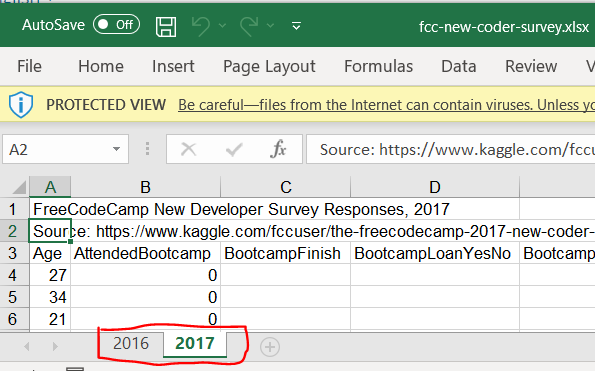

### Select a single sheet

In [ ]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("fcc_survey.xlsx",
                               sheet_name = 1) # by passing the sheet's position

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

In [ ]:
# Create df from second worksheet by referencing its name
responses_2017 = pd.read_excel("fcc_survey.xlsx",
                               sheet_name = '2017') # by providing the sheet's name

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

### Select multiple sheets

In [ ]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name = ['2016', '2017']) # by name with a list

# View the data type of all_survey_data
print(type(all_survey_data))

In [ ]:
output:
<class 'dict'>

In [ ]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name= [0, '2017']) # by position and name

# View the sheet names in all_survey_data
print(all_survey_data.keys())

In [ ]:
output:
dict_keys([0, '2017'])

In [ ]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name = None) # without listing them all

# View the sheet names in all_survey_data
print(all_survey_data.keys())

In [ ]:
output:
dict_keys(['2016', '2017'])

### Work with multiple spreadsheets
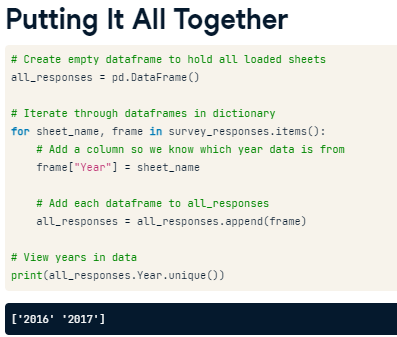

In [9]:
# Load the 2016
responses_2016 = pd.read_excel("fcc-new-coder-survey.xlsx",
                                sheet_name = '2016')
responses_2016.shape

(1002, 98)

In [10]:
# Load the 2017
responses_2017 = pd.read_excel("fcc-new-coder-survey.xlsx",
                                sheet_name = 1)
responses_2017.shape

(1002, 98)

In [7]:
# Load both the 2016 and 2017 sheets by name
responses = pd.read_excel("fcc-new-coder-survey.xlsx",
                           sheet_name = ['2016', '2017'])

In [8]:
# Create an empty dataframe
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

all_responses.shape

# # Graph employment statuses in sample
# counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
# counts.plot.barh()
# plt.show()

Adding 1002 rows
Adding 1002 rows


C:\Users\wuyao\AppData\Local\Temp\ipykernel_14108\764506043.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_responses = all_responses.append(df)


(2004, 99)

## Modifying imports: true/false data

### Set Boolean columns
Datasets may have columns that are most accurately modeled as Boolean values. However, pandas usually loads these as floats by default, since defaulting to Booleans may have undesired effects like turning NA values into Trues.

In [ ]:
# Load the data
survey_data = pd.read_excel("fcc_survey_subset.xlsx")

# Count NA values in each column
print(survey_data.isna().sum())

In [ ]:
output:

ID.x                        0
HasDebt                     0
HasFinancialDependents      7
HasHomeMortgage           499
HasStudentDebt            502
dtype: int64

## Set custom true/false values
In Boolean columns, pandas automatically recognizes certain values, like "TRUE" and 1, as True, and others, like "FALSE" and 0, as False. Some datasets, like survey data, can use unrecognized values, such as "Yes" and "No".

In [ ]:
survey_subset = pd.read_excel("fcc_survey_yn_data.xlsx")

# View the data
print(survey_subset.head())

In [ ]:
                               ID.x AttendedBootCampYesNo HasDebt  HasFinancialDependents  HasHomeMortgage  HasStudentDebt
0  cef35615d61b202f1dc794ef2746df14                    No     Yes                     1.0              0.0             1.0
1  323e5a113644d18185c743c241407754                    No      No                     0.0              NaN             NaN
2  b29a1027e5cd062e654a63764157461d                    No      No                     0.0              NaN             NaN
3  04a11e4bcb573a1261eb0d9948d32637                    No     Yes                     0.0              0.0             1.0
4  9368291c93d5d5f5c8cdb1a575e18bec                    No     Yes                     0.0              0.0             0.0

In [ ]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("fcc_survey_yn_data.xlsx",
                              dtype={"HasDebt": bool,
                              "AttendedBootCampYesNo": bool},
                              true_values=['Yes'],
                              false_values=['No'])

# View the data
print(survey_subset.head())

In [ ]:
<script.py> output:
                                   ID.x  AttendedBootCampYesNo  HasDebt  HasFinancialDependents  HasHomeMortgage  HasStudentDebt
    0  cef35615d61b202f1dc794ef2746df14                  False     True                     1.0              0.0             1.0
    1  323e5a113644d18185c743c241407754                  False    False                     0.0              NaN             NaN
    2  b29a1027e5cd062e654a63764157461d                  False    False                     0.0              NaN             NaN
    3  04a11e4bcb573a1261eb0d9948d32637                  False     True                     0.0              0.0             1.0
    4  9368291c93d5d5f5c8cdb1a575e18bec                  False     True                     0.0              0.0             0.0

## Modifying imports: parsing dates
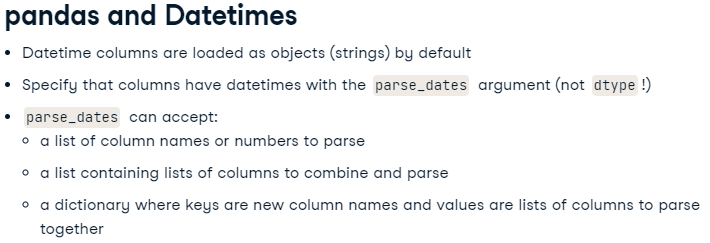

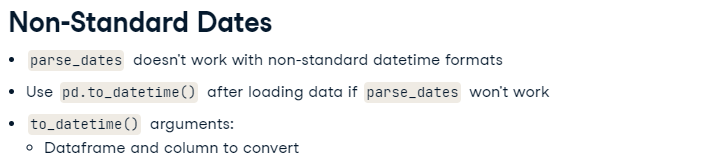

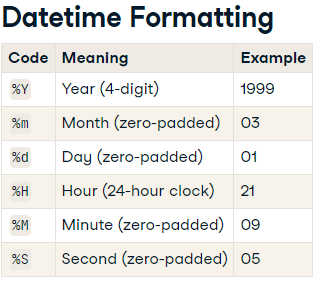

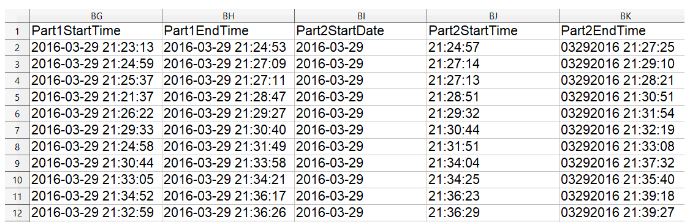

### Parse simple dates
Correctly modeling datetimes is easy when they are in a standard format -- we can use the `parse_dates` argument to tell `read_excel()` to read columns as datetime data.

In [ ]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("fcc_survey.xlsx",
                            parse_dates = ['Part1StartTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())

In [ ]:
<script.py> output:
    0   2016-03-29 21:23:13
    1   2016-03-29 21:24:59
    2   2016-03-29 21:25:37
    3   2016-03-29 21:21:37
    4   2016-03-29 21:26:22
    Name: Part1StartTime, dtype: datetime64[ns]

### Get datetimes from multiple columns
Sometimes, datetime data is split across columns. A dataset might have a date and a time column, or a date may be split into year, month, and day columns.

A column in this version of the survey data has been split so that dates are in one column, `Part2StartDate`, and times are in another, `Part2StartTime`. Your task is to use `read_excel()`'s `parse_dates` argument to combine them into one datetime column with a new name.

In [ ]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ["Part2StartDate", "Part2StartTime"]}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel("fcc_survey_dts.xlsx",
                            parse_dates = datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

In [ ]:
<script.py> output:
    count                    1000
    unique                    985
    top       2016-03-30 07:27:25
    freq                        2
    first     2016-03-29 21:24:57
    last      2016-03-30 09:08:18
    Name: Part2Start, dtype: object

## Parse non-standard date formats
If a date is in a non-standard format, like 19991231 for December 31, 1999, it can't be parsed at the import stage. Instead, use `pd.to_datetime()` to convert strings to dates after import.

In [ ]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part2EndTime"] = pd.to_datetime(survey_data["Part2EndTime"], 
                                             format="%m%d%Y %H:%M:%S")

# Print first few values of Part2EndTime
print(survey_data["Part2EndTime"].head())

In [ ]:
<script.py> output:
    0   2016-03-29 21:27:25
    1   2016-03-29 21:29:10
    2   2016-03-29 21:28:21
    3   2016-03-29 21:30:51
    4   2016-03-29 21:31:54
    Name: Part2EndTime, dtype: datetime64[ns]

# Importing Data from Databases

## Introduction to databases

### SQLite
SQLite databases are stored as regular, self-contained computer files, just as CSVs and Excel files are, making them great for sharing data. 

### Connecting to Databases
Two-step process:
* 1. Create way to connect to databcase
* 2. Query database

### Creating a Database Engine
* `sqlalchemy`'s `create_engine()` makes an engine to handle database connections
 - Needs string URL of database to connect to
 - SQLite URL fomat" `sqlite:///filename.db`

### Querying Databases
* `pd.read_sql(query, engine)` to load in data from a databas
* Arguments
 - `query`: String containing SQL query to run or table to load
 - `engine`: Connection/database engine object

install SQLite and import data.db in it.
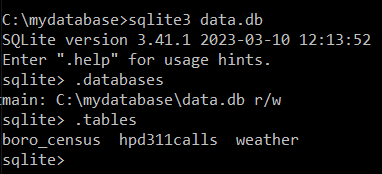

Getting Data from a Database

In [2]:
# Load pandas and sqlalchemy's create_engine
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# Create database engine to manage connections
engine = create_engine("sqlite:///data.db")

In [11]:
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


C:\Users\wuyao\AppData\Local\Temp\ipykernel_10596\1043810782.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  print(engine.table_names())


In [8]:
# Load entire weather table by table name
weather = pd.read_sql("weather", engine)
weather

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,03/27/2018,March,3.36,0.01,0.0,,47,34
117,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,03/28/2018,March,4.03,0.03,0.0,,52,38
118,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,03/29/2018,March,2.91,0.03,0.0,,53,49
119,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,03/30/2018,March,4.03,0.03,0.0,,62,44


In [10]:
# Load entire weather table with SQL
weather_1 = pd.read_sql("SELECT * FROM weather", engine)
                        
print(weather_1.head())

       station                         name  latitude  longitude  elevation  \
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  -73.96925       42.7   

         date     month  awnd  prcp  snow tavg  tmax  tmin  
0  12/01/2017  December  5.37  0.00   0.0         52    42  
1  12/02/2017  December  3.13  0.00   0.0         48    39  
2  12/03/2017  December  2.01  0.00   0.0         48    42  
3  12/04/2017  December  3.58  0.00   0.0         51    40  
4  12/05/2017  December  6.71  0.75   0.0         61    50  


## Refining imports with SQL queries

### Selecting columns with SQL

In [12]:
# # Create database engine for data.db
# engine = create_engine("sqlite:///data.db")

# Write query to get date, tmax, and tmin from weather
query = """
SELECT date, 
       tmax, 
       tmin
  FROM weather;
"""

# Make a dataframe by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting dataframe
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


### Selecting rows

In [14]:
import matplotlib.pyplot as plt

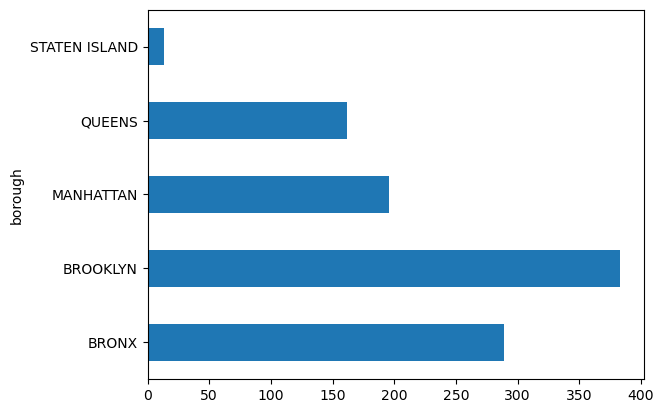

In [15]:
# Create query to get hpd311calls records about safety
query = """
SELECT *
FROM hpd311calls
WHERE complaint_type = 'SAFETY';
"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

### Filtering on multiple conditions

In [16]:
# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
  WHERE tmax <= 32
  or snow >= 1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude     elevation       awnd      prcp  \
count  2.500000e+01  2.500000e+01  2.500000e+01  25.000000  25.00000   
mean   4.077898e+01 -7.396925e+01  4.270000e+01   7.739600   0.17600   
std    2.175584e-14  4.351168e-14  1.450389e-14   2.621778   0.36947   
min    4.077898e+01 -7.396925e+01  4.270000e+01   3.130000   0.00000   
25%    4.077898e+01 -7.396925e+01  4.270000e+01   5.820000   0.00000   
50%    4.077898e+01 -7.396925e+01  4.270000e+01   7.830000   0.00000   
75%    4.077898e+01 -7.396925e+01  4.270000e+01   9.170000   0.09000   
max    4.077898e+01 -7.396925e+01  4.270000e+01  12.970000   1.41000   

            snow       tmax       tmin  
count  25.000000  25.000000  25.000000  
mean    1.332000  27.320000  17.160000  
std     2.685256   7.122266   7.673982  
min     0.000000  13.000000   5.000000  
25%     0.000000  22.000000  11.000000  
50%     0.000000  28.000000  17.000000  
75%     1.200000  31.000000  20.000000  
max     9.800000  40.00

## More complex SQL queries

### Getting distinct values

In [17]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a dataframe
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


### Counting in groups

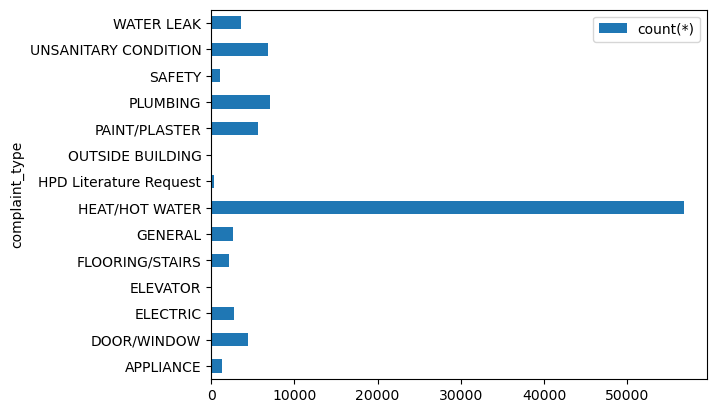

In [18]:
# Create query to get call counts by complaint_type
query = """
SELECT DISTINCT complaint_type,
     count(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

### Working with aggregate functions

In [19]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get dataframe of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


## Loading multiple tables with joins

### Joining tables

In [20]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather 
  ON hpd311calls.created_date = weather.date;
"""

# Create dataframe of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the dataframe to make sure all columns were joined
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type incident_zip  \
0   38070822   01/01/2018    HPD  HEAT/HOT WATER        10468   
1   38065299   01/01/2018    HPD        PLUMBING        10003   
2   38066653   01/01/2018    HPD  HEAT/HOT WATER        10452   
3   38070264   01/01/2018    HPD  HEAT/HOT WATER        10032   
4   38072466   01/01/2018    HPD  HEAT/HOT WATER        11213   

       incident_address community_board    borough      station  \
0    2786 JEROME AVENUE        07 BRONX      BRONX  USW00094728   
1  323 EAST   12 STREET    03 MANHATTAN  MANHATTAN  USW00094728   
2  1235 GRAND CONCOURSE        04 BRONX      BRONX  USW00094728   
3  656 WEST  171 STREET    12 MANHATTAN  MANHATTAN  USW00094728   
4       1030 PARK PLACE     08 BROOKLYN   BROOKLYN  USW00094728   

                          name  ...  longitude  elevation        date  \
0  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  01/01/2018   
1  NY CITY CENTRAL PARK, NY US  ...  -73.96925       42.7  0

### Joining and filtering

In [21]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
  WHERE hpd311calls.complaint_type = 'WATER LEAK';"""

# Load query results into the leak_calls dataframe
leak_calls = pd.read_sql(query, engine)

# View the dataframe
print(leak_calls.head())

  unique_key created_date agency complaint_type incident_zip  \
0   38074305   01/01/2018    HPD     WATER LEAK        11212   
1   38078748   01/01/2018    HPD     WATER LEAK        10458   
2   38081097   01/01/2018    HPD     WATER LEAK        11221   
3   38077874   01/01/2018    HPD     WATER LEAK        11418   
4   38081110   01/01/2018    HPD     WATER LEAK        11420   

          incident_address community_board   borough  prcp  
0     1026 WILLMOHR STREET     17 BROOKLYN  BROOKLYN   0.0  
1       2700 MARION AVENUE        07 BRONX     BRONX   0.0  
2  192 MALCOLM X BOULEVARD     03 BROOKLYN  BROOKLYN   0.0  
3    129-11 JAMAICA AVENUE       09 QUEENS    QUEENS   0.0  
4        111-17 133 STREET       10 QUEENS    QUEENS   0.0  


### Joining, filtering, and aggregating

In [22]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT hpd311calls.created_date, 
	  COUNT(*), 
       weather.tmax,
       weather.tmin
  FROM hpd311calls 
       JOIN weather
       ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'HEAT/HOT WATER' 
 GROUP BY hpd311calls.created_date;
 """

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9


# Importing JSON Data and Working with APIs

## Introduction to JSON

## Introduction to APIs
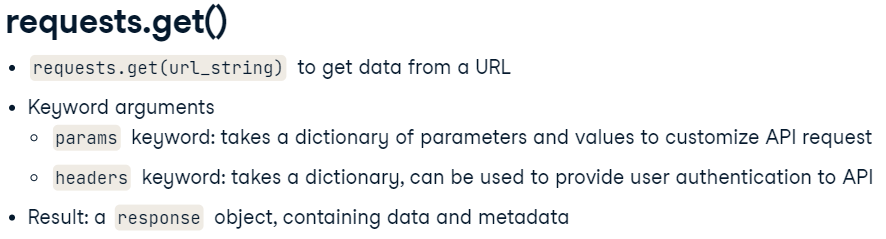

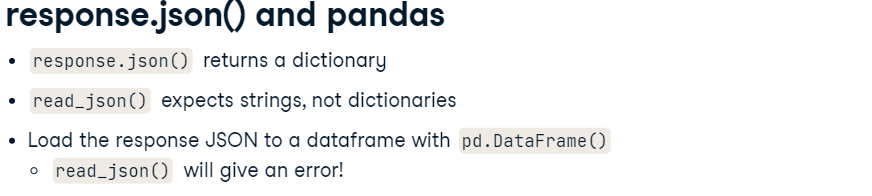

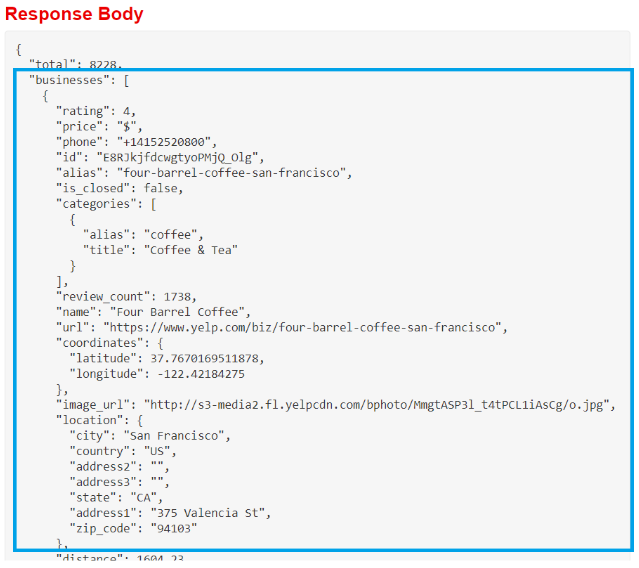

### Get data from an API
use `requests.get()` to query the Yelp Business Search API for cafes in New York City. `requests.get()` needs a URL to get data from. The Yelp API also needs search parameters and authorization headers passed to the `params` and `headers` keyword arguments, respectively.<br><br>
extract the data from the response with its `json()` method, and pass it to `pandas's DataFrame()` function to make a dataframe. Note that the necessary data is under the dictionary key "businesses"

In [2]:
import requests

In [ ]:
api_url = "https://api.yelp.com/v3/businesses/search"

# # Set up parameter dictionary according to documentation
# params = {"term": "cafe",
#           "location": "NYC"}
# # Set up header dictionary w/ API key according to documention
# headers = {"Authorization": "Bearer {}".format(api_key)}

# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                        headers=headers, 
                        params=params)

# Extract JSON data from the response
data = response.json()

# Load data to a dataframe
cafes = pd.DataFrame(data["businesses"])

# View the data's dtypes
print(cafes.dtypes)

In [ ]:
output:
    
id                object
alias             object
name              object
image_url         object
is_closed           bool
url               object
review_count       int64
categories        object
rating           float64
coordinates       object
transactions      object
location          object
phone             object
display_phone     object
distance         float64
price             object
dtype: object

### Set API parameters
Formatting parameters to get the data you need is an integral part of working with APIs. These parameters can be passed to the `get()` function's `params` keyword argument as a dictionary.<br><br>
The Yelp API requires the `location` parameter be set. It also lets users supply a `term` to search for. You'll use these parameters to get data about cafes in NYC, then process the result to create a dataframe.

In [ ]:
# The API endpoint is stored in the variable api_url. 
# Authorization data is stored in the dictionary headers.

# Create dictionary to query API for cafes in NYC
parameters = {"term": "cafe",
              "location": "NYC"}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                        headers = headers,
                        params = parameters)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a dataframe and print head
cafes = pd.DataFrame(data["businesses"])
print(cafes.head())

In [ ]:
output:
    
id                        alias               name                                          image_url  is_closed  ...                                           location  \
0  CBmrwh7jHn88M4v8Q9Qyyg       white-noise-brooklyn-2        White Noise  https://s3-media2.fl.yelpcdn.com/bphoto/rcNRZr...      False  ...  {'address1': '71 Smith St', 'address2': '', 'a...   
1  NG-KlDcSjBk3pfdzjXmMVw          devocion-brooklyn-3           Devocion  https://s3-media1.fl.yelpcdn.com/bphoto/xEKPpn...      False  ...  {'address1': '276 Livingston St', 'address2': ...   
2  pimuUR-TEHIjUla3S3jemQ   coffee-project-ny-new-york  Coffee Project NY  https://s3-media2.fl.yelpcdn.com/bphoto/2Wtg4i...      False  ...  {'address1': '239 E 5th St', 'address2': None,...   
3  wTA00Dov2lFYXKnZ58eXAQ  spreadhouse-cafe-new-york-3   Spreadhouse Cafe  https://s3-media2.fl.yelpcdn.com/bphoto/YsBfwR...      False  ...  {'address1': '116 Suffolk St', 'address2': '',...   
4  vijwGDNrPBJHEG7_DsjZNw             usagi-ny-dumbo-7           Usagi NY  https://s3-media2.fl.yelpcdn.com/bphoto/5gCxDD...      False  ...  {'address1': '163 Plymouth St', 'address2': ''...   

          phone   display_phone  distance price  
0                                1856.127   NaN  
1  +17182856180  (718) 285-6180  2087.817    $$  
2  +12122287888  (212) 228-7888  2435.843    $$  
3  +16465246353  (646) 524-6353  1657.233     $  
4  +17188018037  (718) 801-8037   635.782    $$  

[5 rows x 16 columns]

## Set request headers
Many APIs require users provide an API key, obtained by registering for the service. Keys typically are passed in the request header, rather than as parameters.<br>

The [Yelp API documentation](https://docs.developer.yelp.com/docs/fusion-authentication) says "To authenticate API calls with the API Key, set the `Authorization` HTTP header value as `Bearer API_KEY`."
* API_KEY是独有的key,可自己在网站上申请

You'll set up a dictionary to pass this information to `get()`, call the API for the highest-rated cafes in NYC, and parse the response.

In [ ]:
# Create dictionary that passes Authorization and key string
headers = {"Authorization": "Bearer {}".format(api_key)}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                        headers=headers,
                        params=params)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print names
cafes = pd.DataFrame(data["businesses"])
print(cafes.name)

In [ ]:
output:

0             Coffee Project NY
1                Urban Backyard
2              Saltwater Coffee
3                 Bird & Branch
4                  Bibble & Sip
5             Coffee Project NY
6                        Burrow
7                   Cafe Patoro
8                     Sweatshop
9                       Round K
10               Kobrick Coffee
11            Kaigo Coffee Room
12              Absolute Coffee
13                     Devocion
14                The Uncommons
15                      Butler 
16              Cafe Hanamizuki
17    Brooklyn Roasting Company
18             Takahachi Bakery
19              Happy Bones NYC
Name: name, dtype: object

## Working with nestd JSONs
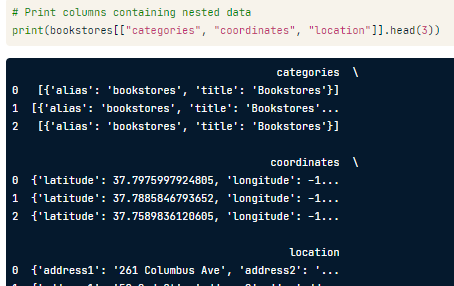

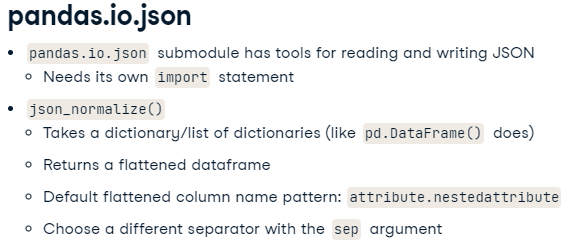

### Flatten nested JSONs
A feature of JSON data is that it can be nested: an attribute's value can consist of attribute-value pairs. This nested data is more useful unpacked, or flattened, into its own dataframe columns. The `pandas.io.json` submodule has a function, `json_normalize()`, that does exactly this.

The Yelp API response data is nested. Your job is to flatten out the next level of data in the `coordinates` and `location` columns.

In [ ]:
# Load json_normalize()
from pandas.io.json import json_normalize

# Isolate the JSON data from the API response
data = response.json()

# Flatten business data into a dataframe, replace separator
cafes = pd.json_normalize(data["businesses"],
             sep="_")

# View data
print(cafes.head())

In [ ]:
output:

                       id                        alias               name                                          image_url  is_closed  ... location_zip_code  location_country location_state  \
0  CBmrwh7jHn88M4v8Q9Qyyg       white-noise-brooklyn-2        White Noise  https://s3-media2.fl.yelpcdn.com/bphoto/rcNRZr...      False  ...             11201                US             NY   
1  NG-KlDcSjBk3pfdzjXmMVw          devocion-brooklyn-3           Devocion  https://s3-media1.fl.yelpcdn.com/bphoto/xEKPpn...      False  ...             11201                US             NY   
2  pimuUR-TEHIjUla3S3jemQ   coffee-project-ny-new-york  Coffee Project NY  https://s3-media2.fl.yelpcdn.com/bphoto/2Wtg4i...      False  ...             10003                US             NY   
3  wTA00Dov2lFYXKnZ58eXAQ  spreadhouse-cafe-new-york-3   Spreadhouse Cafe  https://s3-media2.fl.yelpcdn.com/bphoto/YsBfwR...      False  ...             10002                US             NY   
4  vijwGDNrPBJHEG7_DsjZNw             usagi-ny-dumbo-7           Usagi NY  https://s3-media2.fl.yelpcdn.com/bphoto/5gCxDD...      False  ...             11201                US             NY   

                  location_display_address price  
0        [71 Smith St, Brooklyn, NY 11201]   NaN  
1  [276 Livingston St, Brooklyn, NY 11201]    $$  
2       [239 E 5th St, New York, NY 10003]    $$  
3     [116 Suffolk St, New York, NY 10002]     $  
4       [163 Plymouth St, Dumbo, NY 11201]    $$  

[5 rows x 24 columns]

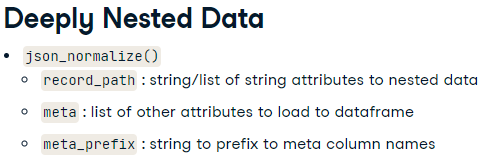

### Handle deeply nested data
Last exercise, you flattened data nested down one level. Here, you'll unpack more deeply nested data.

The `categories` attribute in the Yelp API response contains lists of objects. To flatten this data, you'll employ `json_normalize()` arguments to specify the path to `categories` and pick other attributes to include in the dataframe. You should also change the separator to facilitate column selection and prefix the other attributes to prevent column name collisions. 

In [ ]:
# Specify record path to get categories data
flat_cafes = json_normalize(data["businesses"],
                            sep="_",
                            record_path='categories')

# View the data
print(flat_cafes.head())

In [ ]:
output:
              alias              title
0            coffee       Coffee & Tea
1            coffee       Coffee & Tea
2  coffeeroasteries  Coffee Roasteries
3             cafes              Cafes
4            coffee       Coffee & Tea

In [ ]:
# Load other business attributes and set meta prefix
flat_cafes = json_normalize(data["businesses"],
                            sep="_",
                            record_path="categories",
                            meta=['name', 
                                  'alias',  
                                  'rating',
                                  ['coordinates', 'latitude'], 
                                  ['coordinates', 'longitude']],
# Add "biz_" as a meta_prefix to prevent duplicate column names.
                            meta_prefix='biz_')

# View the data
print(flat_cafes.head())

In [ ]:
output:

              alias              title           biz_name                   biz_alias biz_rating biz_coordinates_latitude biz_coordinates_longitude
0            coffee       Coffee & Tea        White Noise      white-noise-brooklyn-2        4.5                   40.689                   -73.988
1            coffee       Coffee & Tea           Devocion         devocion-brooklyn-3        4.0                   40.689                   -73.983
2  coffeeroasteries  Coffee Roasteries           Devocion         devocion-brooklyn-3        4.0                   40.689                   -73.983
3             cafes              Cafes           Devocion         devocion-brooklyn-3        4.0                   40.689                   -73.983
4            coffee       Coffee & Tea  Coffee Project NY  coffee-project-ny-new-york        4.5                   40.727                   -73.989

## Combining multiple datasets
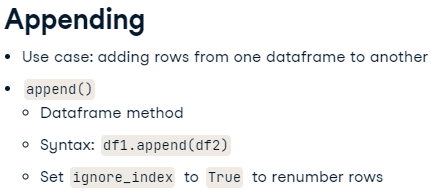

### Append dataframes
APIs often limit the amount of data returned, since sending large datasets can be time- and resource-intensive. The Yelp Business Search API limits the results returned in a call to 50 records. However, the `offset` parameter lets a user retrieve results starting after a specified number. By modifying the offset, we can get results 1-50 in one call and 51-100 in another. Then, we can append the dataframes.

In [ ]:
# The 50 top-rated cafes are already in a dataframe, top_50_cafes.
# Add an offset parameter to get cafes 51-100
params = {"term": "cafe", 
          "location": "NYC",
          "sort_by": "rating", 
          "limit": 50,
          "offset": 50}

result = requests.get(api_url, headers=headers, params=params)
next_50_cafes = json_normalize(result.json()["businesses"])

# Append the results, setting ignore_index to renumber rows
cafes = top_50_cafes.append(next_50_cafes, ignore_index=True)

# Print shape of cafes
print(cafes.shape)

In [ ]:
output:
(100, 24)

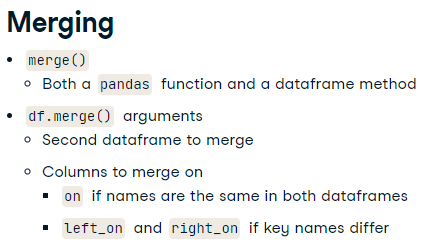

### Merge dataframes
combine that with demographic data to investigate which neighborhood has the most good cafes per capita.

To do this, you'll merge two datasets with the DataFrame `merge()` method. The first,`crosswalk`, is a crosswalk between ZIP codes and Public Use Micro Data Sample Areas (PUMAs), which are aggregates of census tracts and correspond roughly to NYC neighborhoods. Then, you'll merge in `pop_data`, which contains 2016 population estimates for each PUMA.

In [ ]:
# Merge crosswalk into cafes on their zip code fields
cafes_with_pumas = cafes.merge(crosswalk, 
                               left_on="location_zip_code", 
                               right_on="zipcode")

# Merge pop_data into cafes_with_pumas on puma field
cafes_with_pop = cafes_with_pumas.merge(pop_data,
                                        on="puma")

# View the data
print(cafes_with_pop.head())

In [ ]:
output:

alias                                         categories  coordinates_latitude  coordinates_longitude   display_phone  ...  geo_type  \
0  coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]                40.727                -73.989  (212) 228-7888  ...  PUMA2010   
1   saltwater-coffee-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]                40.730                -73.984  (917) 881-2245  ...  PUMA2010   
2   daily-provisions-new-york  [{'alias': 'cafes', 'title': 'Cafes'}, {'alias...                40.738                -73.988  (212) 488-1505  ...  PUMA2010   
3              mud-new-york-3  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...                40.729                -73.987  (212) 228-9074  ...  PUMA2010   
4  coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]                40.727                -73.989  (212) 228-7888  ...  PUMA2010   

                                           geog_name    borough  total_pop_estimate total_pop_moe  
0  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
1  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
2  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
3  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  
4  NYC-Manhattan Community District 3--Chinatown ...  Manhattan              160709          3289  

[5 rows x 37 columns]